# Displaying images in pandas DataFrame

Resource: [Kaggle - Displaying inline images in pandas DataFrame](https://www.kaggle.com/code/stassl/displaying-inline-images-in-pandas-dataframe/notebook).

In [151]:
import os
import sys
import glob
import random
import base64
import pandas as pd

from PIL import Image
from io import BytesIO
from IPython.display import HTML

import xlsxwriter
import openpyxl

In [152]:
pd.set_option('display.max_colwidth', -1)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

/var/folders/75/qy6j96r558l_5q_3hmqzsn4r0000gn/T/ipykernel_64087/1694978098.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Setting current working directory:

In [153]:
# Getting the path leading to the current working directory
project_path = os.getcwd()
print(f"project_path: {project_path}")  # printing "project_path"
# Getting the path leading to the currently executing script
script_path = sys.path[0]
print(f"script_path: {script_path}")    # printing "script_path"
# os.chdir(project_path)                # setting the current working directory based on the path leading to the current working directory
# setting the current working directory based on the path leading to the
# currently executing script
os.chdir(script_path)

project_path: /Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests
script_path: /Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests


In [154]:
id_list = ['5f2fa3630f3c8bf8fef08dc8e8f3c818', '784874c8509f23230c93f1c6909e8945', '75f21d23f43b194674f2016f1ce6b153', '13932827f30cb00d0cb4c40443c788f4', '21a2b151100ddcf57358fa0442aec8b3']
breed_list = ['beagle', 'bull_mastiff', 'groenendael', 'blenheim_spaniel', 'giant_schnauzer']
# Dictionary of lists 
dogs_dict = {'id': id_list, 'breed': breed_list}
dogs_df = pd.DataFrame(dogs_dict)
dogs_df

,id,breed
0,5f2fa3630f3c8bf8fef08dc8e8f3c818,beagle
1,784874c8509f23230c93f1c6909e8945,bull_mastiff
2,75f21d23f43b194674f2016f1ce6b153,groenendael
3,13932827f30cb00d0cb4c40443c788f4,blenheim_spaniel
4,21a2b151100ddcf57358fa0442aec8b3,giant_schnauzer


In [155]:
dogs_df.columns

Index(['id', 'breed'], dtype='object')

In [156]:
dogs_df['file'] = dogs_df.id.map(lambda id: f'{script_path}/dog-breed/{id}.jpg')
dogs_df['file']

0    /Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests/dog-breed/5f2fa3630f3c8bf8fef08dc8e8f3c818.jpg
1    /Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests/dog-breed/784874c8509f23230c93f1c6909e8945.jpg
2    /Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests/dog-breed/75f21d23f43b194674f2016f1ce6b153.jpg
3    /Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests/dog-breed/13932827f30cb00d0cb4c40443c788f4.jpg
4    /Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests/dog-breed/21a2b151100ddcf57358fa0442aec8b3.jpg
Name: file, dtype: object

In [157]:
dogs_df.columns

Index(['id', 'breed', 'file'], dtype='object')

In [158]:
dogs_df['image'] = dogs_df.file.map(lambda f: get_thumbnail(f))
dogs_df

,id,breed,file,image
0,5f2fa3630f3c8bf8fef08dc8e8f3c818,beagle,/Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests/dog-breed/5f2fa3630f3c8bf8fef08dc8e8f3c818.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x113 at 0x118CC8460>
1,784874c8509f23230c93f1c6909e8945,bull_mastiff,/Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests/dog-breed/784874c8509f23230c93f1c6909e8945.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x113 at 0x118CC8640>
2,75f21d23f43b194674f2016f1ce6b153,groenendael,/Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests/dog-breed/75f21d23f43b194674f2016f1ce6b153.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=112x150 at 0x118CC8430>
3,13932827f30cb00d0cb4c40443c788f4,blenheim_spaniel,/Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests/dog-breed/13932827f30cb00d0cb4c40443c788f4.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x101 at 0x118CC83D0>
4,21a2b151100ddcf57358fa0442aec8b3,giant_schnauzer,/Users/anthony/MEGA/DOCUMENTS/Programmation/Python/MyPythonProjects/ReadVCF/tests/dog-breed/21a2b151100ddcf57358fa0442aec8b3.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x100 at 0x118CCB3A0>


Displaying PIL.Image objects embedded in DataFrame:

,breed,image
0,beagle,
1,bull_mastiff,
2,groenendael,
3,blenheim_spaniel,
4,giant_schnauzer,

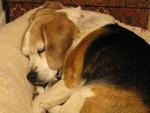
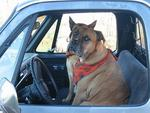
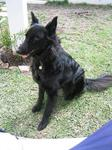
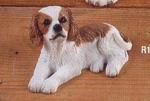
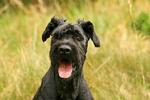

In [159]:
dogs_html = HTML(dogs_df[['breed', 'image']].to_html(formatters={'image': image_formatter}, escape=False))
dogs_html

Exporting DataFrame to HTML file (cf.: "[Stack Overflow - Outputing HTML Ipython object to disk](https://stackoverflow.com/questions/41318765/outputing-html-ipython-object-to-disk)"):

In [160]:
dogs_html_data = dogs_html.data
with open(f'{script_path}/dogs_html.html', 'w') as f:
    f.write(dogs_html_data)

Exporting DataFrame to Microsoft Excel file:

In [161]:
idx = True
dogs_df.to_excel(f'{script_path}/dogs_excel.xlsx', index=idx)

In [162]:
column_names = list(dogs_df.columns)
column_names

['id', 'breed', 'file', 'image']

Converting decimal to excel column name.

Resources:
- ~~[Compute decimal to binary](https://levelup.gitconnected.com/computing-binary-numbers-with-python-a6e00be69bea).~~
- [GeeksforGeeks - Compute decimal to hexadecimal](https://www.geeksforgeeks.org/python-program-to-convert-decimal-to-hexadecimal/)

In [163]:
# Conversion table of remainders to
# "Excel base 26" equivalent
conversion_table = {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E',
                    6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J',
                    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O',
                    16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T',
                    21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y',
                    26: 'Z'}
 
# Function which converts decimal value
# to "Excel base 26" value
def decimalToExcelBase26(decimal):
    excel_base_26 = ''
    while(decimal > 0):
        remainder = decimal % 26
        excel_base_26 = conversion_table[remainder] + excel_base_26
        decimal = decimal // 26
 
    return excel_base_26
  
decimal_number = 1286
print(f'The "Excel base 26" form of {decimal_number} is {decimalToExcelBase26(decimal_number)}.')

The "Excel base 26" form of 1286 is AWL.


Copying function in another variable.

Resources:
- [Programiz - Python Shallow Copy and Deep Copy - Copy an Object in Python](https://www.programiz.com/python-programming/shallow-deep-copy#:~:text=In%20Python%2C%20we%20use%20%3D%20operator,reference%20to%20new_list%20using%20%3D%20operator.).
- [Stack Overflow - Rename a function](https://stackoverflow.com/questions/71638902/rename-a-function):
    ```python
    bark = print
    bark('Hello World')
    ```

In [164]:
get_column_mapping = decimalToExcelBase26

In [165]:
print(f'The "Excel base 26" form of {decimal_number} is {get_column_mapping(decimal_number)}.')

The "Excel base 26" form of 1286 is AWL.


Inserting images into Microsoft Excel worksheet.

Resource:
- [XlsxWriter - Example: Inserting images into a worksheet](https://xlsxwriter.readthedocs.io/example_images.html).

In [166]:
image_col_idx = column_names.index('image')+2
image_col_idx

5

In [167]:
image_col_idx_excel = get_column_mapping(image_col_idx)
image_col_idx_excel

'E'

In [168]:
from openpyxl.drawing.image import Image

# Opening existing workbook
workbook = openpyxl.load_workbook(f'{script_path}/dogs_excel.xlsx')
# Opening existing worksheet
worksheet = workbook['Sheet1']
num_sample = len(dogs_df.index)
# Inserting images
for row in range(num_sample):
    img_path = dogs_df.at[row, 'file']
    img = Image(img_path)
    img.width = 20
    img.height = 20
    cell_address = image_col_idx_excel+str(row+2)
    worksheet[cell_address] = ''  # erasing current cell content
    worksheet.add_image(img, cell_address)
# Saving workbook
workbook.save(f'{script_path}/dogs_excel.xlsx')